<a href="https://colab.research.google.com/github/moimigueldev/tensorflow-ztm/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: Predicting a numerical variable based on some other combination of variables... predicting a number



In [ ]:
# Import TensorFlow
import tensorflow as tf

print(tf.__version__)

2.8.0


# Create data to view and fit

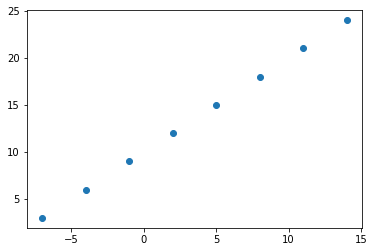

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([[ True,  True,  True,  True,  True,  True,  True,  True]])

# Input and Output shapes

In [ ]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [ ]:
X[1], y[1]

IndexError: ignored

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

In [ ]:
X[0].ndim

In [ ]:
X[0], y[0]

In [ ]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

In [ ]:
plt.scatter(X, y)

## steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layrs of a deep learning model.

2. **Compiling a model** - define a loss function (The function which tells our model how wrong it is.) and the optimizer (tells our model how to improve the pattersn it's learning. and evaluation metrics (What we can use to interprit the performance of out model.)

3. **Fitting a model** - letting the model try to find patterns between X & y (features & labels)


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 506ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 10.9748 - mae: 10.9748


(TensorShape([8, 1]), (8,))

In [ ]:
# Checkout X and y
X, y

(<tf.Tensor: shape=(1, 8), dtype=float64, numpy=array([[-7., -4., -1.,  2.,  5.,  8., 11., 14.]])>,
 <tf.Tensor: shape=(1, 8), dtype=float64, numpy=array([[ 3.,  6.,  9., 12., 15., 18., 21., 24.]])>)

In [ ]:
y_pred = model.predict([17.0])
y_pred + 112

array([[23.71602]], dtype=float32)

# Improving our model